In [84]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from tensorflow.keras import layers, models
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import tensorflow as tf
from PIL import Image
import pandas as pd
import numpy as np
import kagglehub
import pathlib
import random
import os

Importing model, dataset. Layers freezing, data normalization

In [ ]:

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data() #### 10 classes

base_model = tf.keras.applications.ResNet50(input_shape=(32, 32, 3),
                                               include_top=False,
                                               weights='imagenet')

base_model.trainable = False

for layer in base_model.layers[-1:]:
    layer.trainable = True

classifier = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(10, activation='softmax')  ###### Top layer - 10 neurons for 10 classes
])


x_train = x_train / 255.0 ####### Data normalization
x_test = x_test / 255.0

classifier.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(0.0001),
              metrics=["accuracy"])

history = classifier.fit(x_train, y_train,
                        epochs=5,
                        steps_per_epoch=len(x_test)+len(y_test),
                        validation_data=(x_train, y_train),
                        validation_steps=len(x_train)+len(y_train))

Epoch 1/5
16667/20000 ━━━━━━━━━━━━━━━━━━━━ 2:47 50ms/step - accuracy: 0.1795 - loss: 2.2384

C:\Users\dendo\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


20000/20000 ━━━━━━━━━━━━━━━━━━━━ 1801s 90ms/step - accuracy: 0.1868 - loss: 2.2211 - val_accuracy: 0.2410 - val_loss: 2.0352
Epoch 2/5
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 1952s 98ms/step - accuracy: 0.2855 - loss: 1.9973 - val_accuracy: 0.3113 - val_loss: 1.9386
Epoch 3/5
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 1999s 100ms/step - accuracy: 0.3054 - loss: 1.9346 - val_accuracy: 0.3212 - val_loss: 1.9031
Epoch 4/5
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 2689s 134ms/step - accuracy: 0.3227 - loss: 1.8993 - val_accuracy: 0.3399 - val_loss: 1.8648
Epoch 5/5
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 1032s 52ms/step - accuracy: 0.3365 - loss: 1.8671 - val_accuracy: 0.3473 - val_loss: 1.8429


Make a prediction

313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step


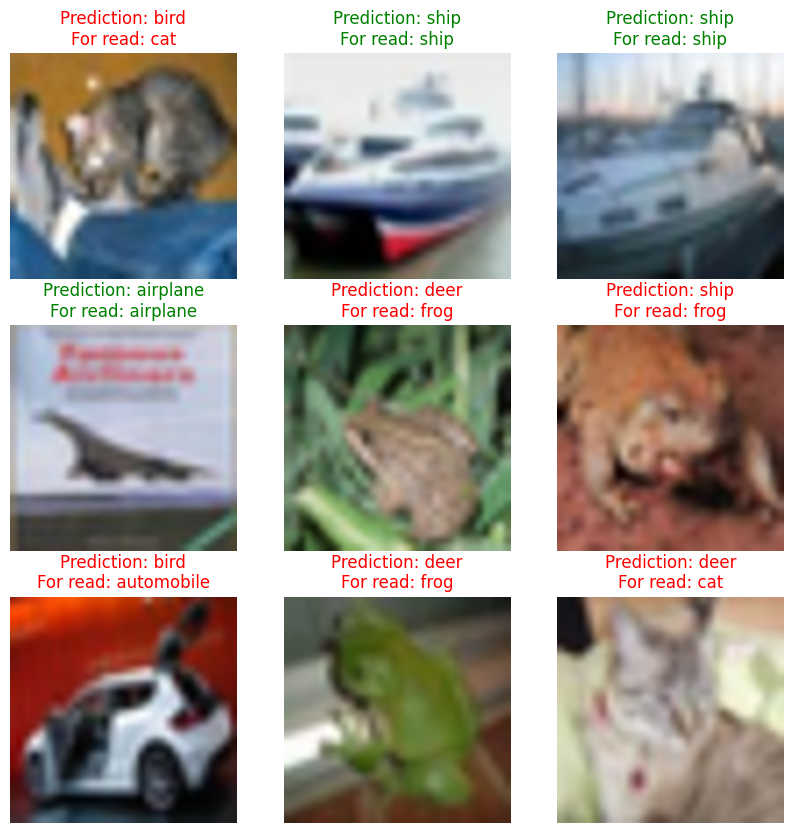

In [82]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", 
               "dog", "frog", "horse", "ship", "truck"]

y_pred = np.argmax(classifier.predict(x_test), axis=1)

def output_prediction_vs_forreal(images_quantity):
    plt.figure(figsize=(10, 10))
    for i in range(images_quantity):
        plt.subplot(3, 3, i + 1)
        plt.imshow(Image.fromarray((x_test[i] * 255).astype(np.uint8)).resize((224, 224)))
        true_label = class_names[y_test[i][0]]
        pred_label = class_names[y_pred[i]]
        color = "green" if y_test[i] == y_pred[i] else "red"
        plt.title(f"Prediction: {pred_label}\nFor read: {true_label}", color=color)
        plt.axis("off")
    plt.show()

output_prediction_vs_forreal(9)


Confusion matrix

In [85]:
print("Точність:", accuracy_score(y_test, y_pred))
print("Матриця плутанини:\n", confusion_matrix(y_test, y_pred))
print("Звіт класифікації:\n", classification_report(y_test, y_pred))

Точність: 0.3489
Матриця плутанини:
 [[474  49 142  16  50   6   5  35 186  37]
 [135 326  21  27  29  18  13  57 166 208]
 [149  26 328  61 198  91  10  63  41  33]
 [ 75  48 138 159 168 148  17 112  59  76]
 [103  28 158  67 435  39   8  66  64  32]
 [ 55  34 139 132 134 276   4 132  41  53]
 [147  57 178  73 240  38  84  40  88  55]
 [ 68  41  95  63  93  86   4 403  34 113]
 [203  64  41  19  42  34   4  21 492  80]
 [ 68  82  23  36  39  22   5  68 145 512]]
Звіт класифікації:
               precision    recall  f1-score   support

           0       0.32      0.47      0.38      1000
           1       0.43      0.33      0.37      1000
           2       0.26      0.33      0.29      1000
           3       0.24      0.16      0.19      1000
           4       0.30      0.43      0.36      1000
           5       0.36      0.28      0.31      1000
           6       0.55      0.08      0.15      1000
           7       0.40      0.40      0.40      1000
           8       0.37  

Efficiency visualization

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 1, 1, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │        20,490 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,649,184 (90.21 MB)

 Trainable params: 20,490 (80.04 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 40,982 (160.09 KB)

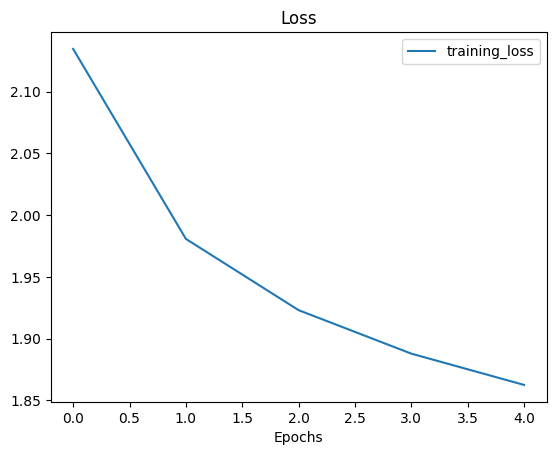

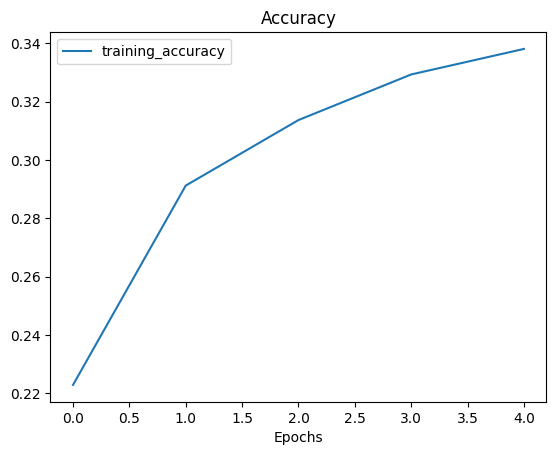

In [86]:
classifier.summary()

loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(len(history.history['loss']))

  # Plot loss
plt.plot(epochs, loss, label='training_loss')
# plt.plot(epochs, val_loss, label='val_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()

  # Plot accuracy
plt.figure()
plt.plot(epochs, accuracy, label='training_accuracy')
# plt.plot(epochs, val_accuracy, label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend();